<a href="https://colab.research.google.com/github/Cyiza22/ML_summative/blob/main/Summative_Intro_to_ml_%5BCyizaHenriette_number%5D_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
import os
os.makedirs('saved_models', exist_ok=True)

# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data


In [2]:
# Download dataset
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

# Load data
data = pd.read_csv(path + "/data.csv")
data.drop(columns=["id", "Unnamed: 32"], inplace=True)

data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

100%|██████████| 48.6k/48.6k [00:00<00:00, 44.3MB/s]

Extracting files...


In [3]:
# Split into features and target
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Split into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
> <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*v1ohAG82xmU6WGsG2hoE8g.png" alt="?" style="width:25px"/>




#Task: Define a function that creates models without and With specified Optimization techniques


In [4]:
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l1, l2, l1_l2 # Import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


def define_model(optimizer='adam', regularizer=None, early_stopping=False, dropout_rate=0.0, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizer))
    model.add(Dropout(dropout_rate))
    model.add(Dense(16, activation='relu', kernel_regularizer=regularizer))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    if early_stopping:
        callbacks = [EarlyStopping(monitor='val_loss', patience=10)]
    else:
        callbacks = []

    return model, callbacks

# Task: Print out the Final Model Accuracy and plot the Loss curve

In [5]:
def train_and_evaluate(model, callbacks, X_train, y_train, X_val, y_val, epochs=50):
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, callbacks=callbacks, verbose=0)
    return history

def plot_loss_curve(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()



In [6]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"ROC AUC: {roc_auc}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.show()

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


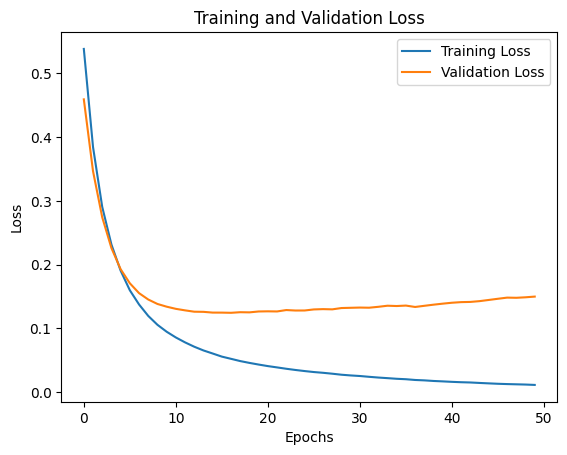

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Accuracy: 0.9649122807017544
F1 Score: 0.9534883720930233
Precision: 0.9534883720930233
Recall: 0.9534883720930233
ROC AUC: 0.9626596790042581


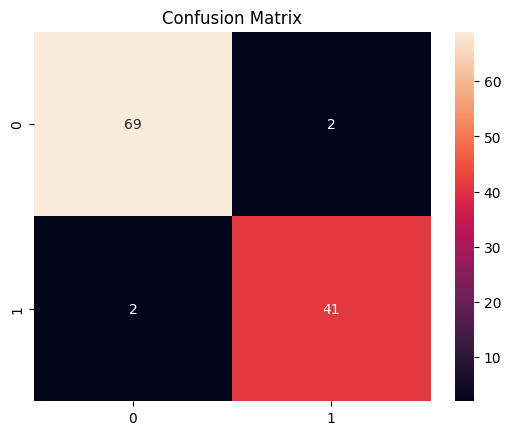

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import tensorflow as tf
# Instance 1: No optimization
model_1, callbacks_1 = define_model(optimizer='adam', regularizer=None, early_stopping=False, dropout_rate=0.0, learning_rate=0.001)
history_1 = train_and_evaluate(model_1, callbacks_1, X_train, y_train, X_val, y_val)
plot_loss_curve(history_1)
evaluate_model(model_1, X_test, y_test)
model_1.save('saved_models/model_1.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


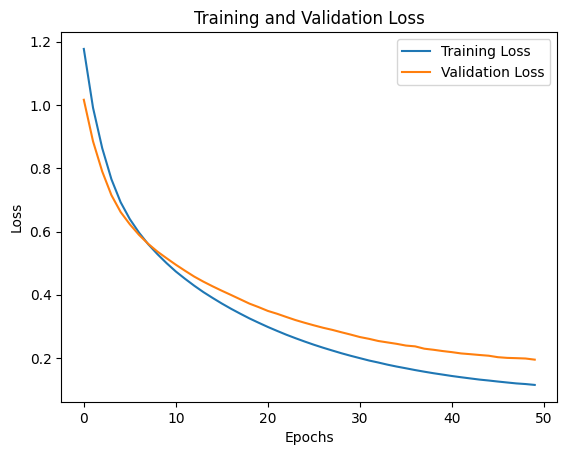

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Accuracy: 0.9736842105263158
F1 Score: 0.9647058823529412
Precision: 0.9761904761904762
Recall: 0.9534883720930233
ROC AUC: 0.9697019325253848


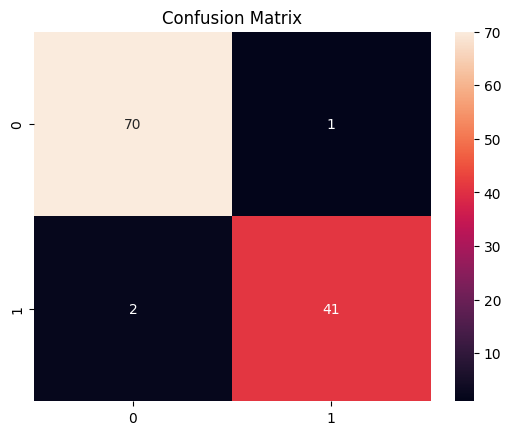

In [10]:
# Instance 2: Adam optimizer, L2 regularization, early stopping
model_2, callbacks_2 = define_model(optimizer='adam', regularizer=l2(0.01), early_stopping=True, dropout_rate=0.0, learning_rate=0.001)
history_2 = train_and_evaluate(model_2, callbacks_2, X_train, y_train, X_val, y_val)
plot_loss_curve(history_2)
evaluate_model(model_2, X_test, y_test)
model_2.save('saved_models/model_2.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


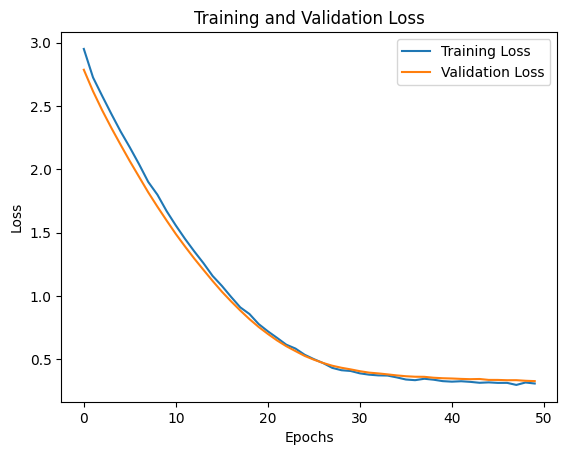

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Accuracy: 0.9736842105263158
F1 Score: 0.9647058823529412
Precision: 0.9761904761904762
Recall: 0.9534883720930233
ROC AUC: 0.9697019325253848


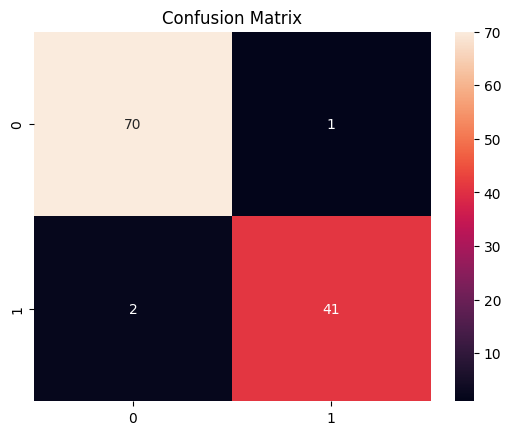

In [11]:
# Instance 3: RMSprop optimizer, L1 regularization, dropout
model_3, callbacks_3 = define_model(optimizer='rmsprop', regularizer=l1(0.01), early_stopping=False, dropout_rate=0.2, learning_rate=0.001)
history_3 = train_and_evaluate(model_3, callbacks_3, X_train, y_train, X_val, y_val)
plot_loss_curve(history_3)
evaluate_model(model_3, X_test, y_test)
model_3.save('saved_models/model_3.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


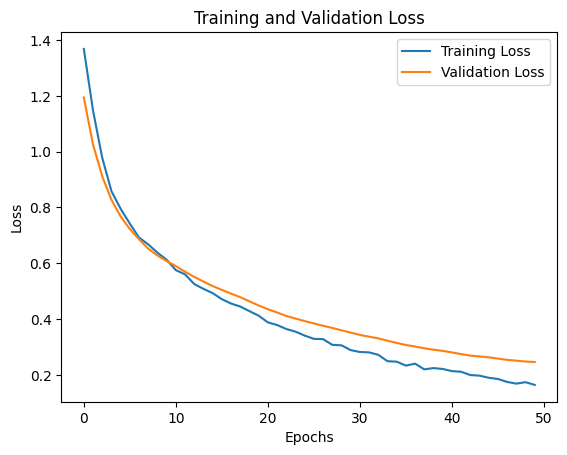

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Accuracy: 0.9736842105263158
F1 Score: 0.9655172413793104
Precision: 0.9545454545454546
Recall: 0.9767441860465116
ROC AUC: 0.9742875859810023


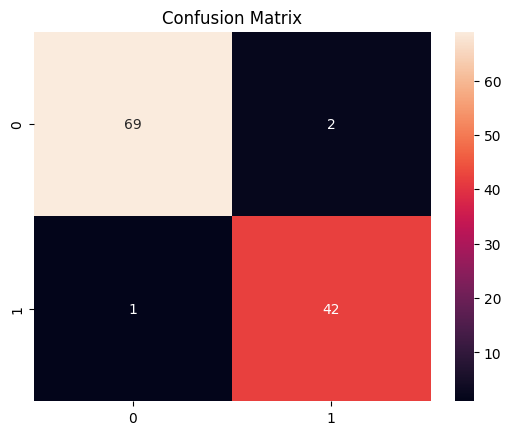

In [12]:
# Instance 4: Adam optimizer, L2 regularization, dropout, early stopping
model_4, callbacks_4 = define_model(optimizer='adam', regularizer=l2(0.01), early_stopping=True, dropout_rate=0.2, learning_rate=0.001)
history_4 = train_and_evaluate(model_4, callbacks_4, X_train, y_train, X_val, y_val)
plot_loss_curve(history_4)
evaluate_model(model_4, X_test, y_test)
model_4.save('saved_models/model_4.h5')

#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [15]:
from tensorflow.keras.models import load_model
# Function to make predictions
def make_predictions(model_path, X_test):
    # Load the model
    model = load_model(model_path)
    # Make predictions
    predictions = model.predict(X_test)
    # Convert probabilities to binary labels (0 or 1)
    predictions = (predictions > 0.5).astype(int)
    return predictions


model_path = "uciml/breast-cancer-wisconsin-data"
predictions = make_predictions(model_path, X_test)
print(predictions)

ValueError: File format not supported: filepath=uciml/breast-cancer-wisconsin-data. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(uciml/breast-cancer-wisconsin-data, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

In [ ]:
model_path = None
make_predictions(None)

Congratulations!!
